In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

In [3]:
import os
os.listdir('/home/ak/.config/matplotlib')
plt.style.use('/home/ak/.config/matplotlib/latexstyle.mplstyle')
folder = '/home/ak/Documents/Research/PaperCode/Thesis Plots'

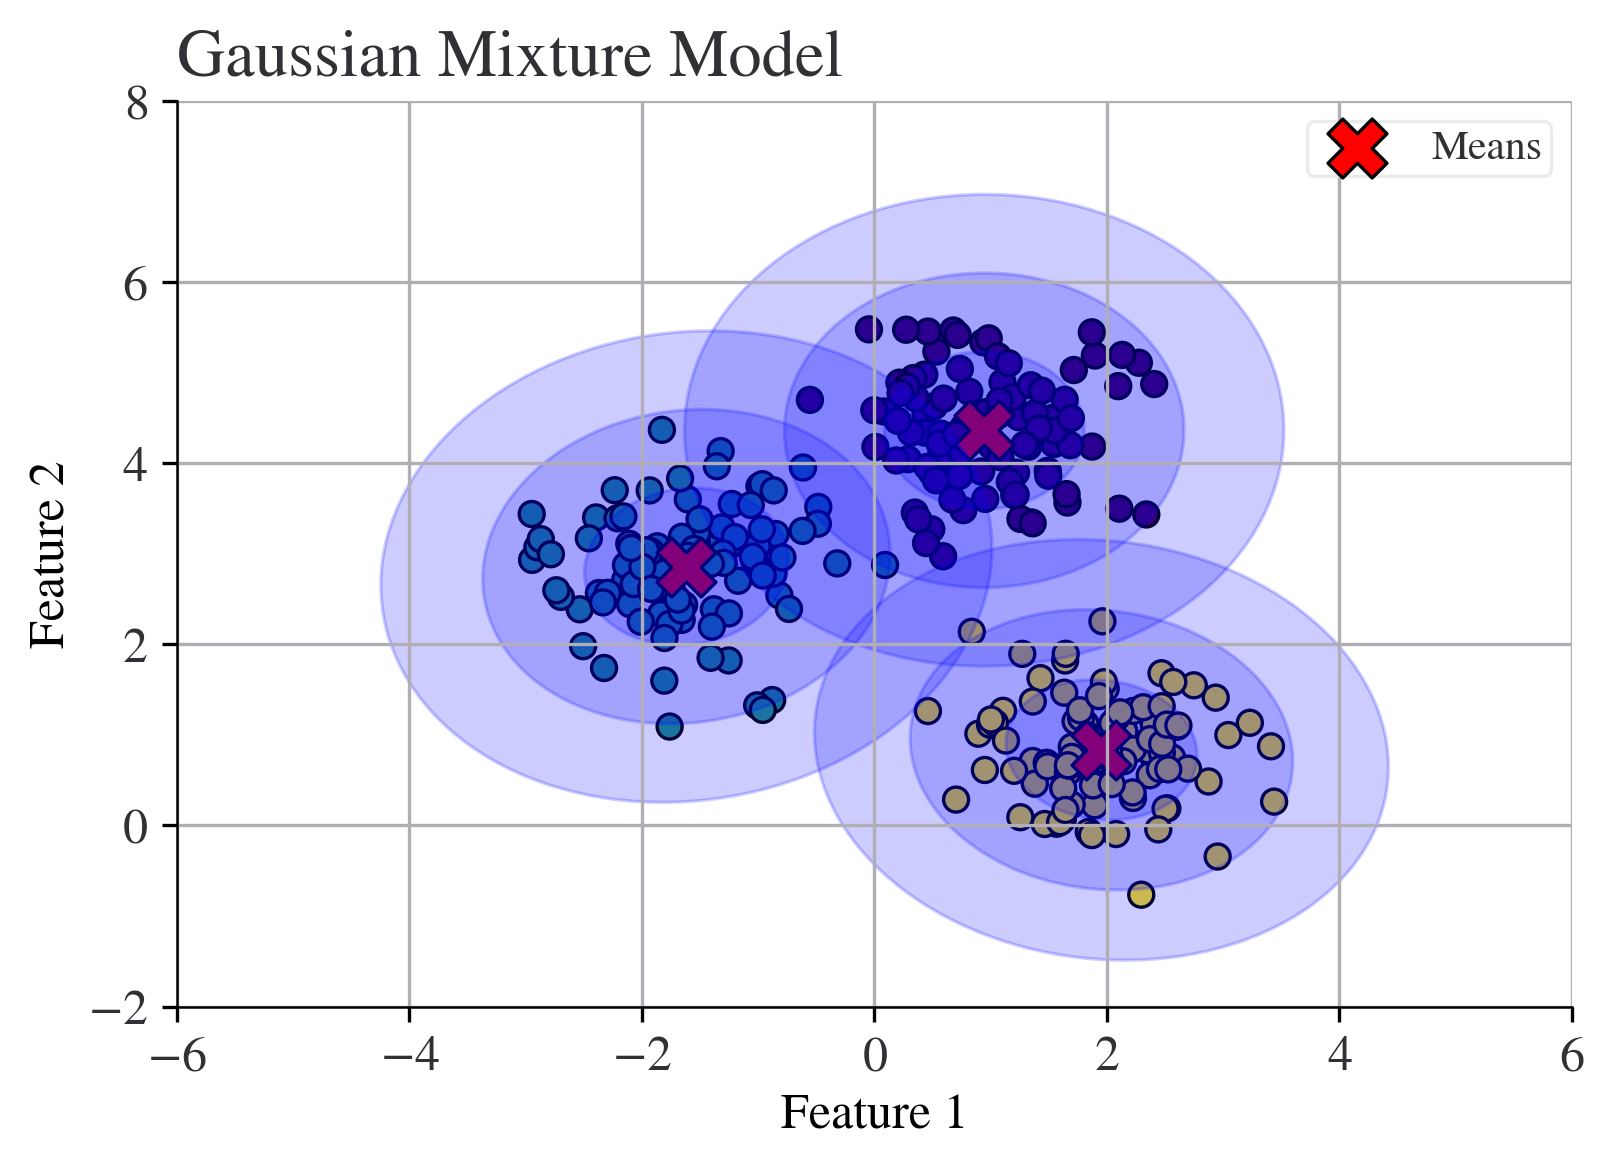

In [5]:


# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
labels = gmm.predict(X)
means = gmm.means_
covariances = gmm.covariances_

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')

# Plot the centers of the Gaussian distributions (means)
plt.scatter(means[:, 0], means[:, 1], c='red', s=200, marker='X', label='Means')

# Plot the contours of the Gaussian distributions
for mean, covar in zip(means, covariances):
    v, w = np.linalg.eigh(covar)
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180. * angle / np.pi
    for i in range(1, 4):
        ell = plt.matplotlib.patches.Ellipse(mean, v[0]*i, v[1]*i, 180 + angle, color='blue', alpha=0.2)
        plt.gca().add_patch(ell)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Mixture Model')
plt.legend()
plt.grid(True)
plt.show()


/home/ak/anaconda3/envs/timeSeries/lib/python3.7/site-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,
/home/ak/anaconda3/envs/timeSeries/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/ak/anaconda3/envs/timeSeries/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


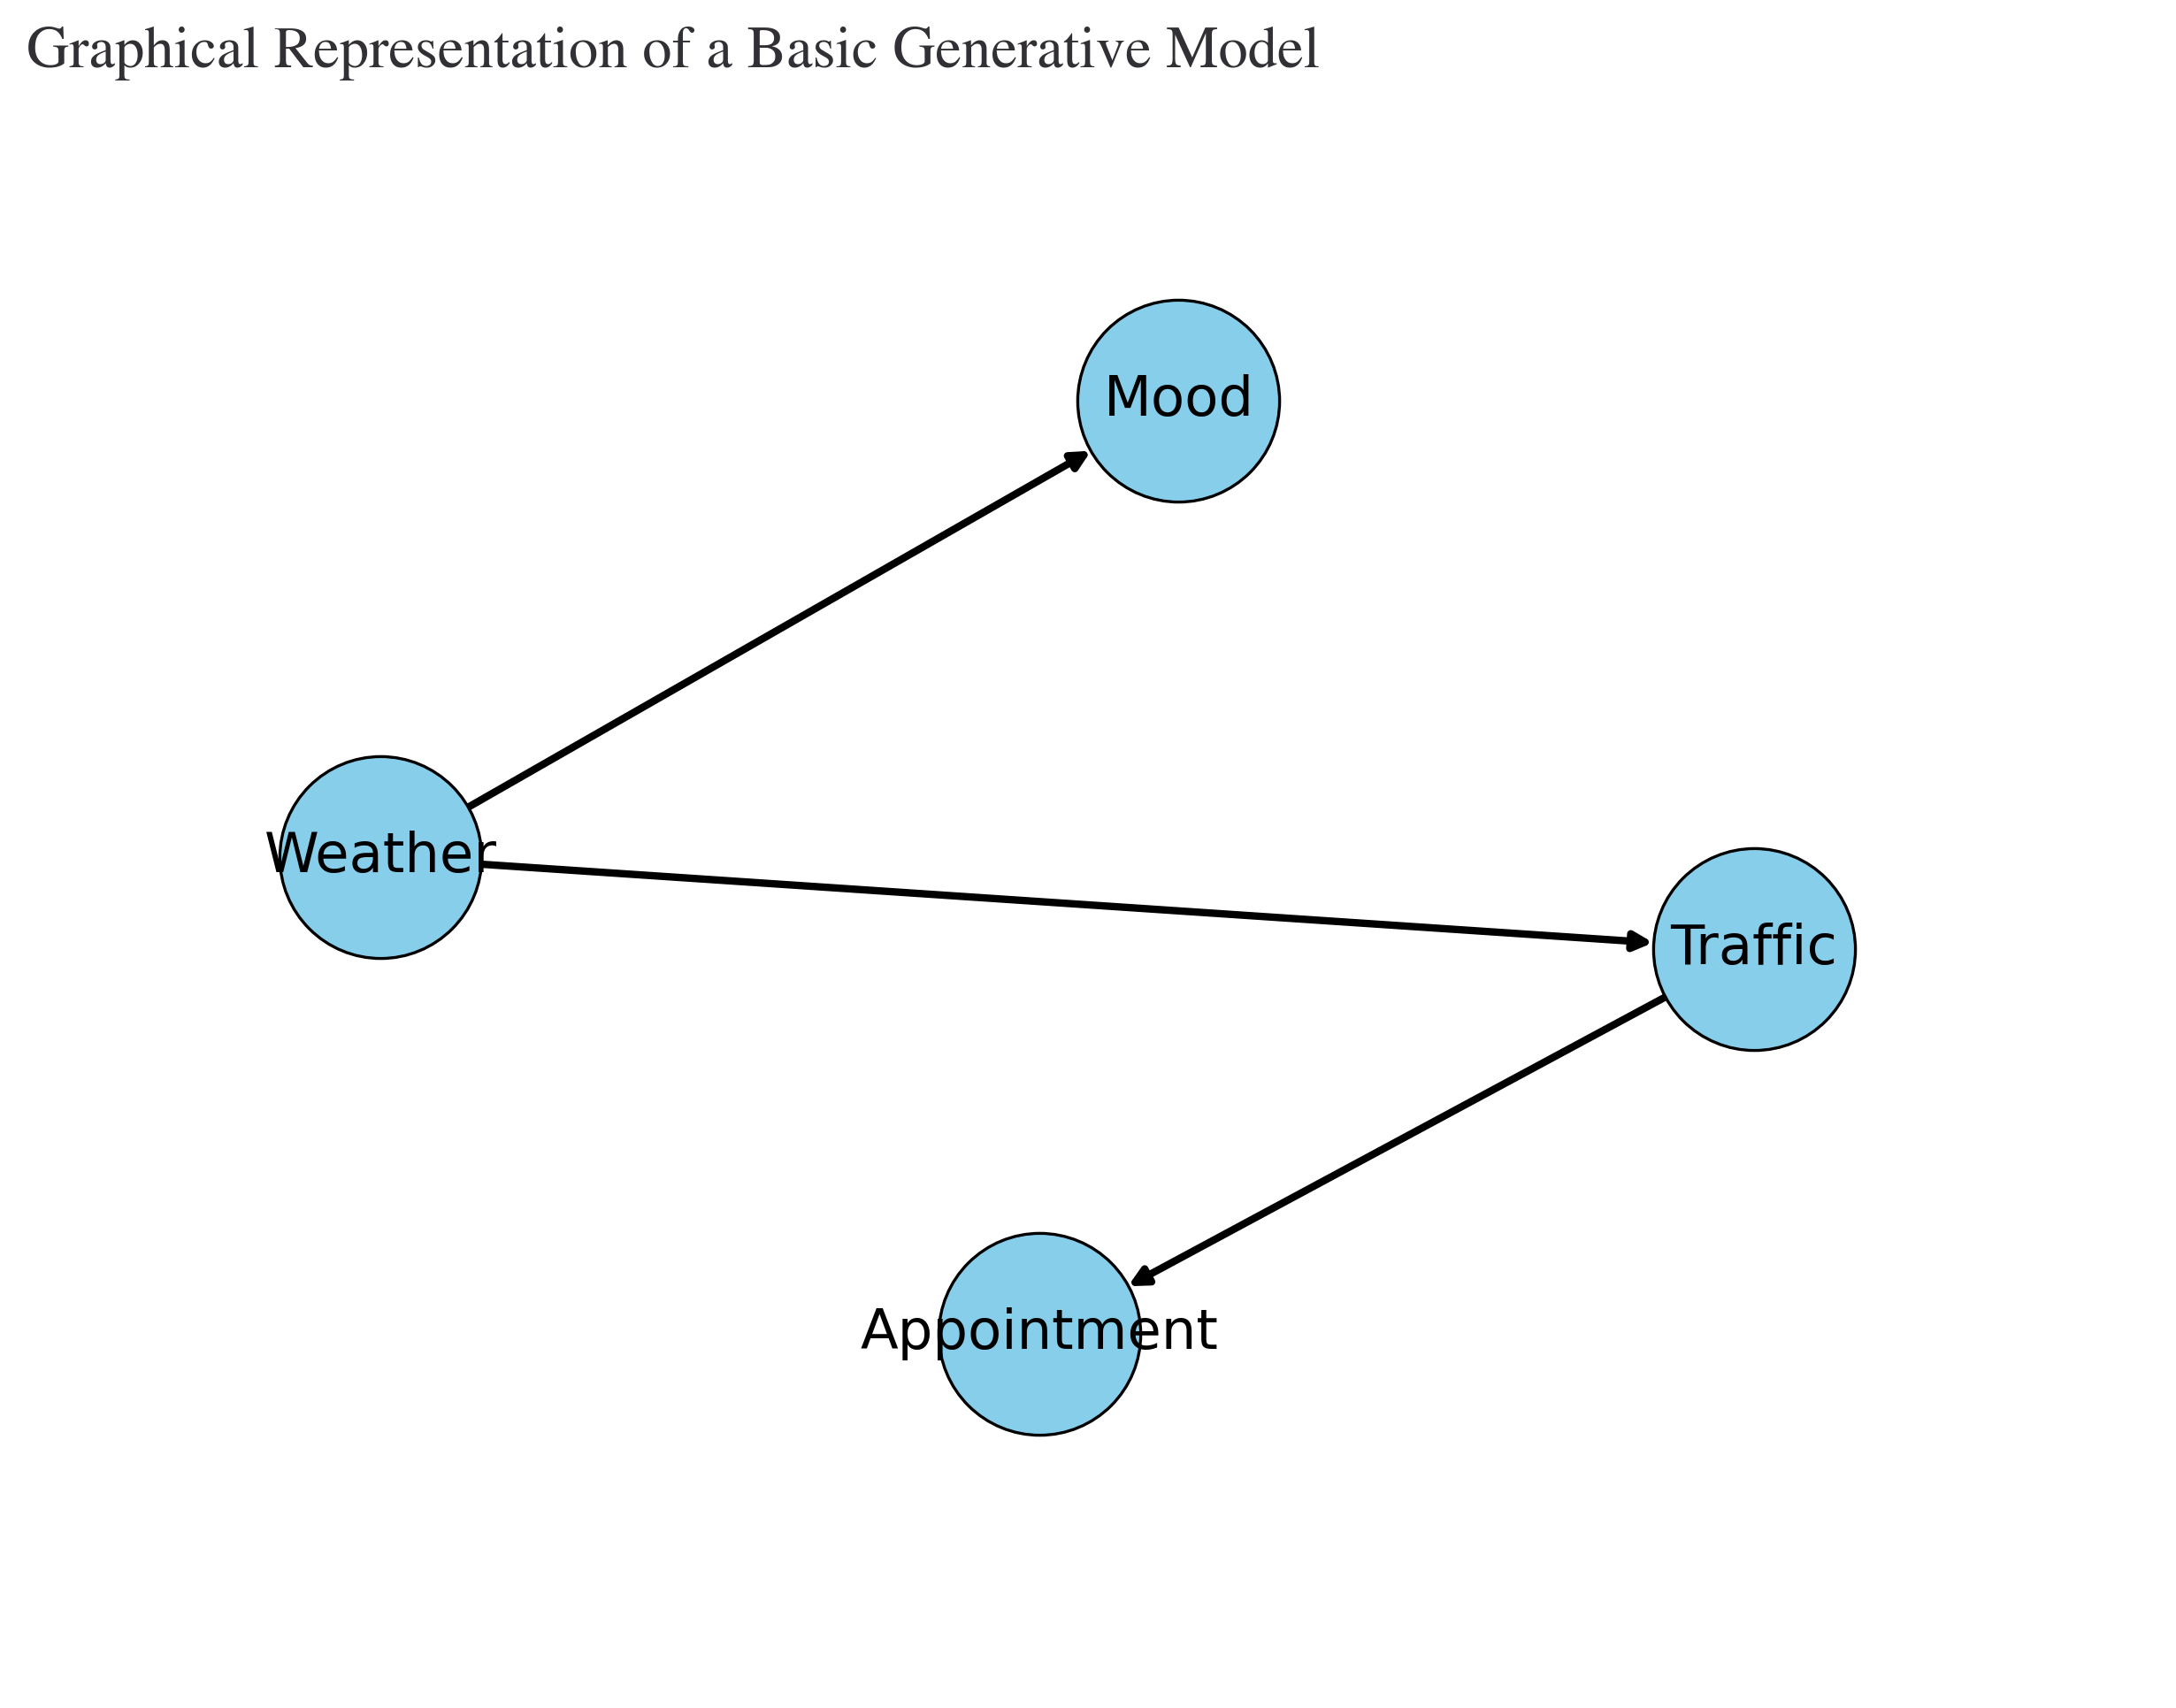

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianModel

# Define the structure (edges) of our Bayesian network
model = BayesianModel([('Weather', 'Traffic'),
                       ('Weather', 'Mood'),
                       ('Traffic', 'Appointment')])

# Plotting the Bayesian Network
pos = nx.spring_layout(model)
plt.figure(figsize=(8, 6))
nx.draw(model, pos, with_labels=True, node_size=3000, node_color='skyblue', width=2, font_size=15)
plt.title('Graphical Representation of a Basic Generative Model')
plt.show()



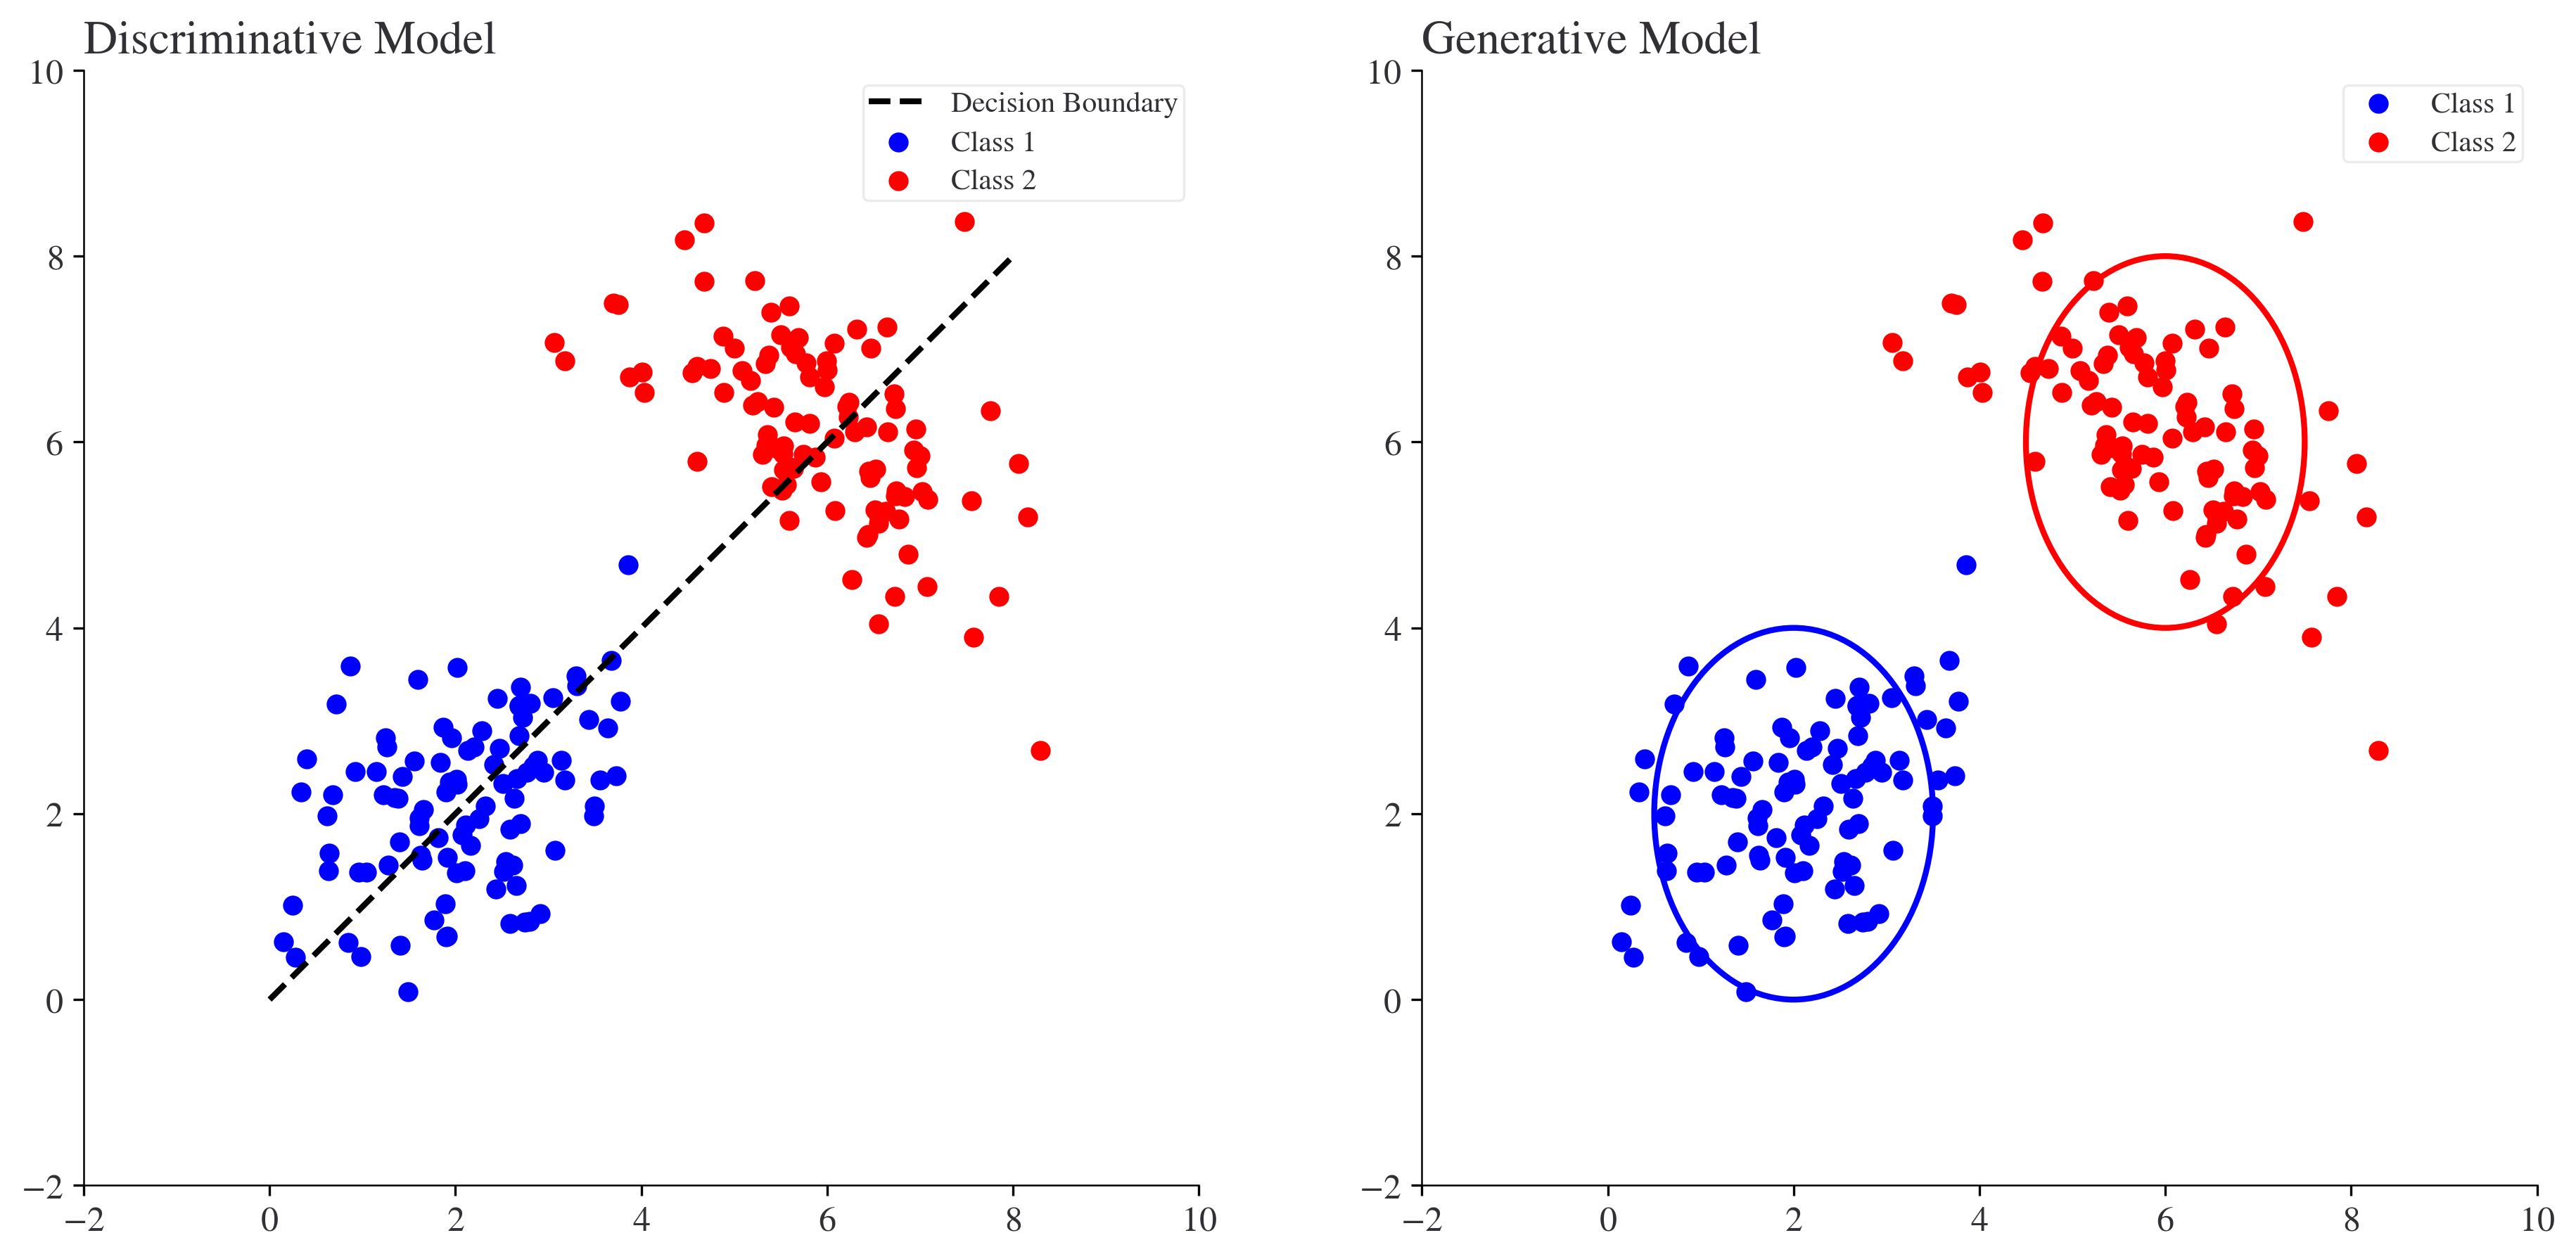

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Generate some example data
np.random.seed(42)
class_1 = np.random.multivariate_normal([2, 2], [[1, 0.5], [0.5, 1]], 100)
class_2 = np.random.multivariate_normal([6, 6], [[1, -0.5], [-0.5, 1]], 100)

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Discriminative Model
ax[0].scatter(class_1[:, 0], class_1[:, 1], label='Class 1', color='blue')
ax[0].scatter(class_2[:, 0], class_2[:, 1], label='Class 2', color='red')
ax[0].set_title('Discriminative Model')
ax[0].plot([0, 8], [0, 8], 'k--', label="Decision Boundary")
ax[0].legend()

# Generative Model
ax[1].scatter(class_1[:, 0], class_1[:, 1], label='Class 1', color='blue')
ax[1].scatter(class_2[:, 0], class_2[:, 1], label='Class 2', color='red')
ax[1].set_title('Generative Model')
ax[1].add_patch(patches.Ellipse((2, 2), 3, 4, fill=False, edgecolor='blue', linewidth=2))
ax[1].add_patch(patches.Ellipse((6, 6), 3, 4, fill=False, edgecolor='red', linewidth=2))
ax[1].legend()

plt.show()


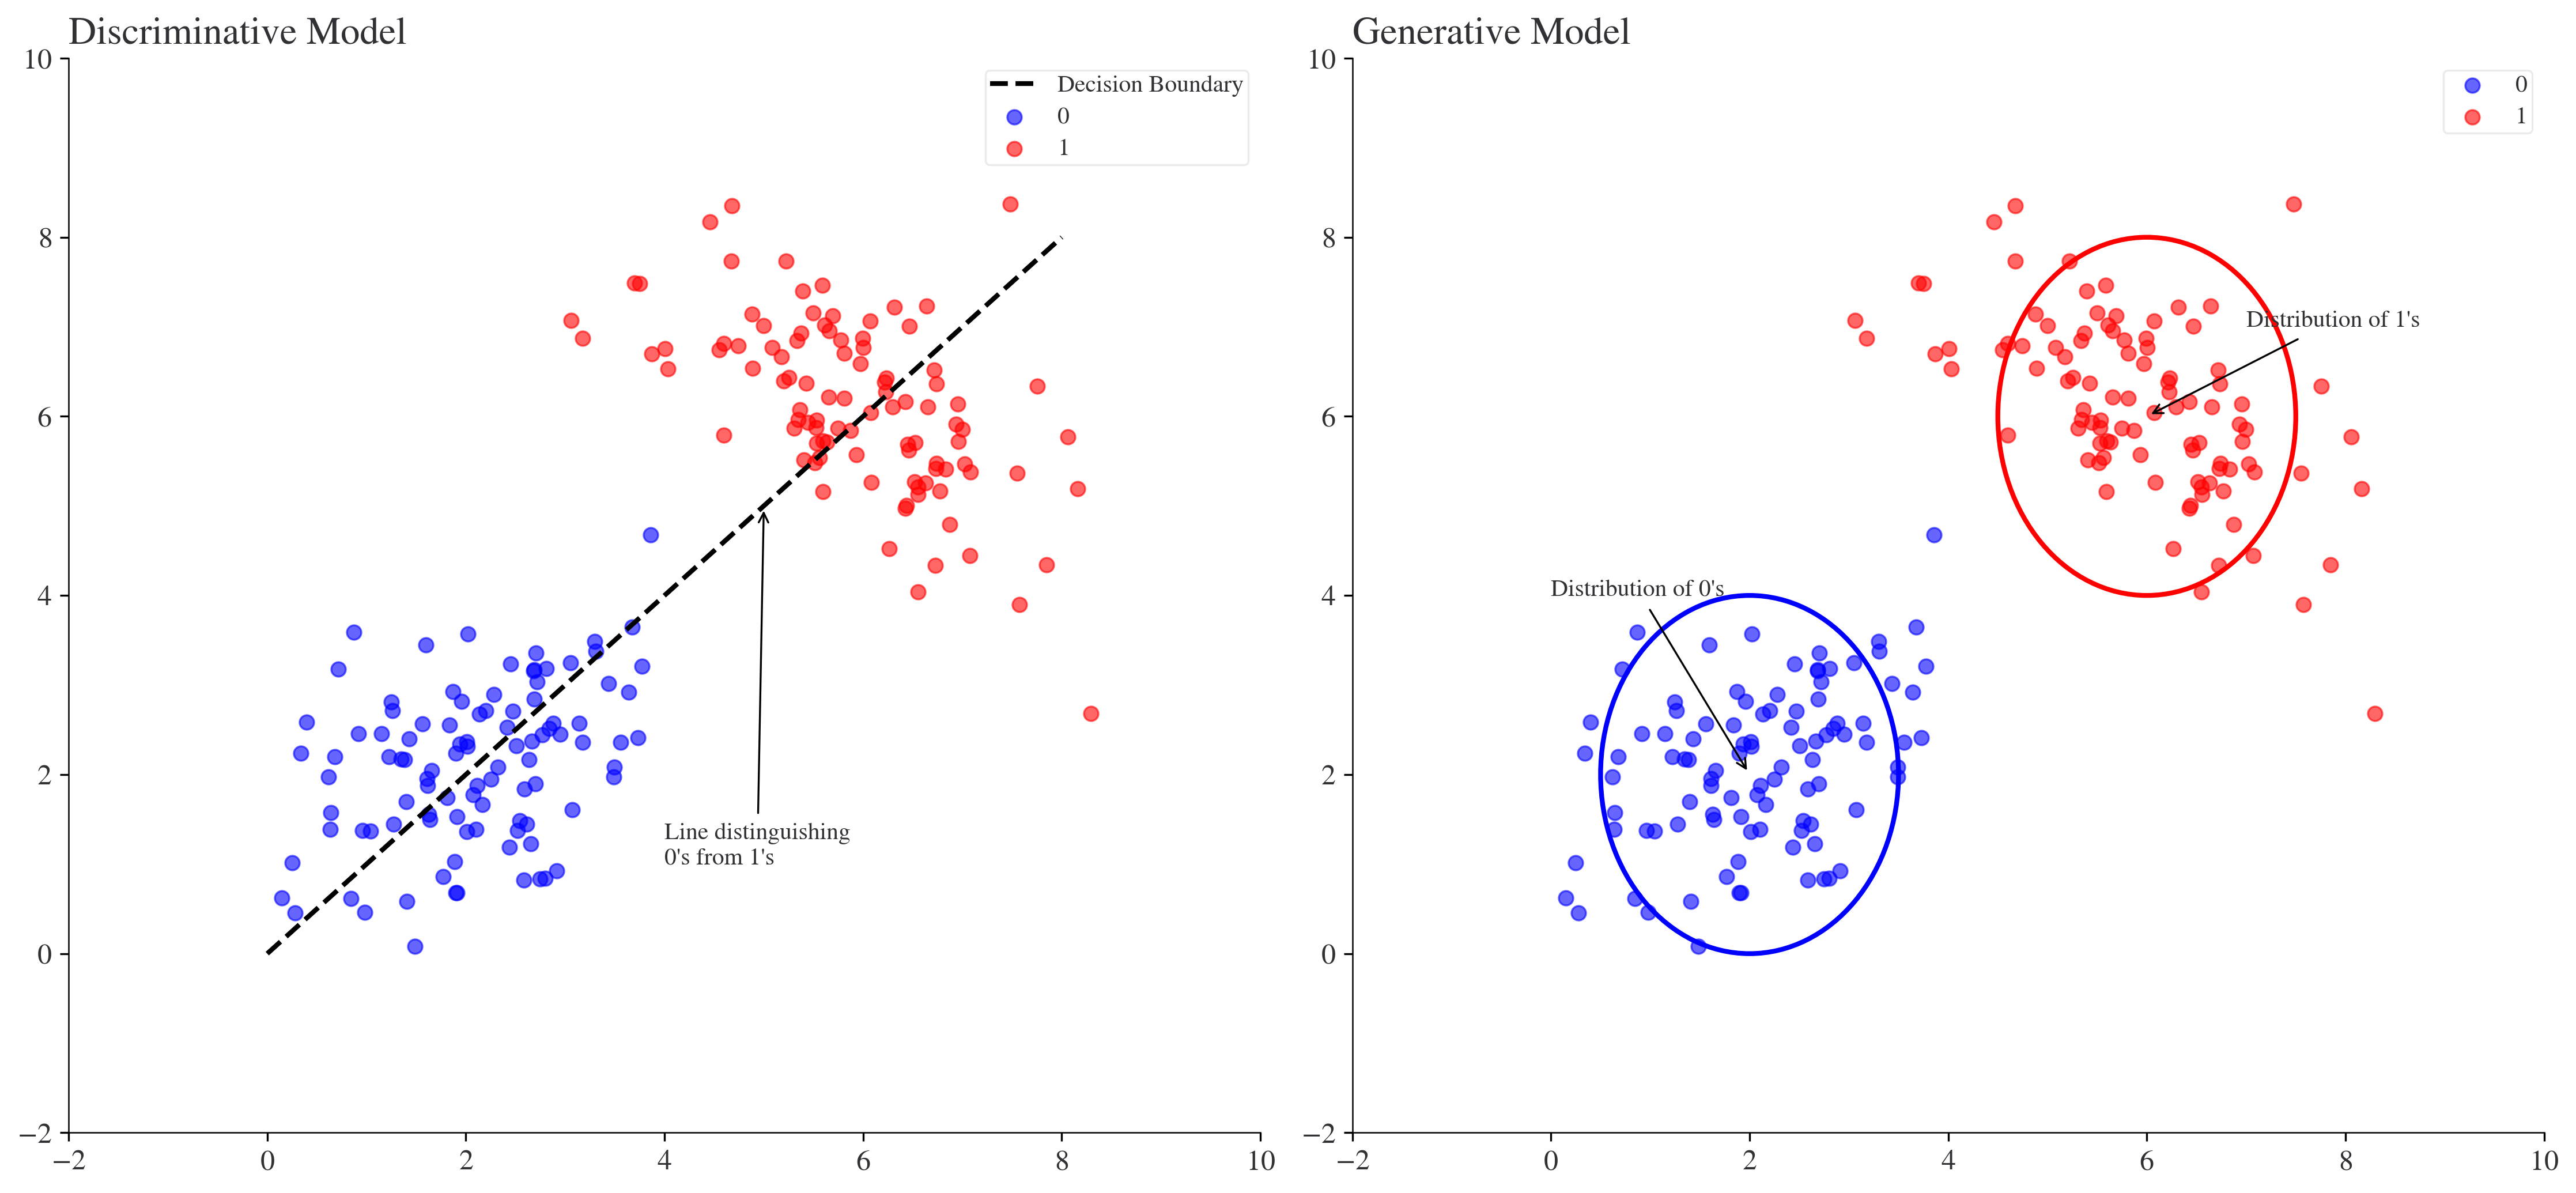

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Generate some example data
np.random.seed(42)
class_1 = np.random.multivariate_normal([2, 2], [[1, 0.5], [0.5, 1]], 100) # representing 0's
class_2 = np.random.multivariate_normal([6, 6], [[1, -0.5], [-0.5, 1]], 100) # representing 1's

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Discriminative Model
ax[0].scatter(class_1[:, 0], class_1[:, 1], label='0', color='blue', alpha=0.6)
ax[0].scatter(class_2[:, 0], class_2[:, 1], label='1', color='red', alpha=0.6)
ax[0].set_title('Discriminative Model')
ax[0].plot([0, 8], [0, 8], 'k--', label="Decision Boundary")
ax[0].annotate("Line distinguishing\n0's from 1's", xy=(5, 5), xytext=(4, 1),
               arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
ax[0].legend()

# Generative Model
ax[1].scatter(class_1[:, 0], class_1[:, 1], label='0', color='blue', alpha=0.6)
ax[1].scatter(class_2[:, 0], class_2[:, 1], label='1', color='red', alpha=0.6)
ax[1].set_title('Generative Model')
ax[1].add_patch(patches.Ellipse((2, 2), 3, 4, fill=False, edgecolor='blue', linewidth=2))
ax[1].add_patch(patches.Ellipse((6, 6), 3, 4, fill=False, edgecolor='red', linewidth=2))
ax[1].annotate("Distribution of 0's", xy=(2, 2), xytext=(0, 4),
               arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
ax[1].annotate("Distribution of 1's", xy=(6, 6), xytext=(7, 7),
               arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
ax[1].legend()

plt.tight_layout()
plt.show()


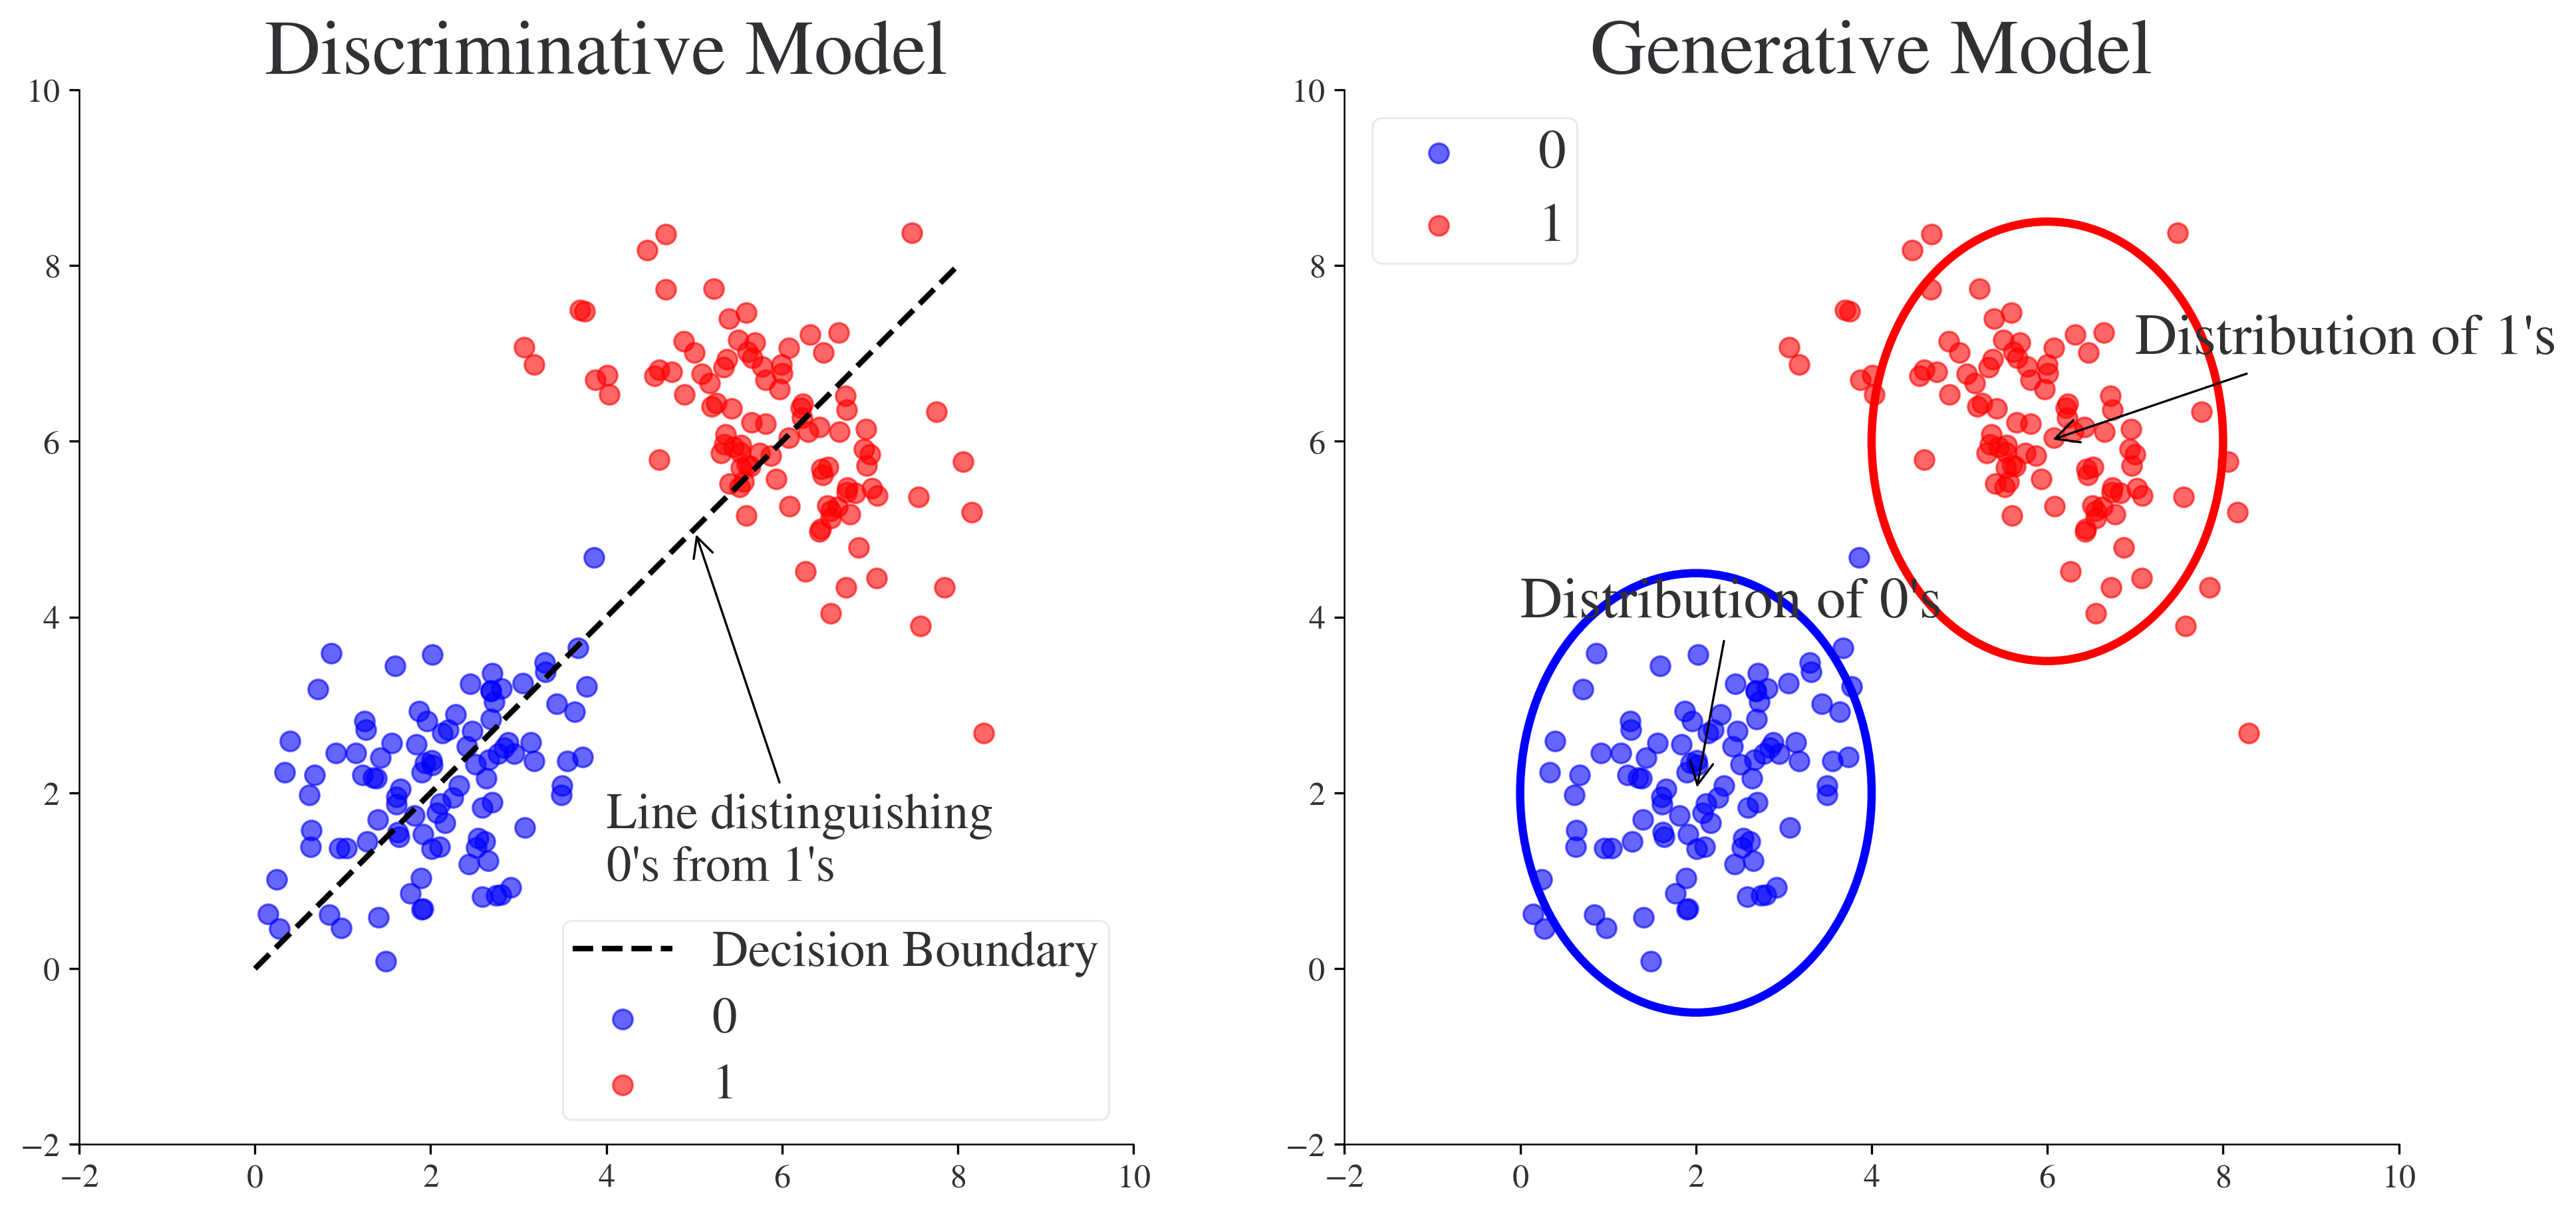

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Generate some example data
np.random.seed(42)
class_1 = np.random.multivariate_normal([2, 2], [[1, 0.5], [0.5, 1]], 100) # representing 0's
class_2 = np.random.multivariate_normal([6, 6], [[1, -0.5], [-0.5, 1]], 100) # representing 1's

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Discriminative Model
ax[0].scatter(class_1[:, 0], class_1[:, 1], label='0', color='blue', alpha=0.6, s=50)
ax[0].scatter(class_2[:, 0], class_2[:, 1], label='1', color='red', alpha=0.6, s=50)
ax[0].set_title('Discriminative Model', loc='center', fontsize=28)
ax[0].plot([0, 8], [0, 8], 'k--', label="Decision Boundary")
ax[0].annotate("Line distinguishing\n0's from 1's", xy=(5, 5), xytext=(4, 1),
               arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=18)
ax[0].legend(fontsize=18)

# Generative Model
ax[1].scatter(class_1[:, 0], class_1[:, 1], label='0', color='blue', alpha=0.6, s=50)
ax[1].scatter(class_2[:, 0], class_2[:, 1], label='1', color='red', alpha=0.6, s=50)
ax[1].set_title('Generative Model', loc='center', fontsize=28)
ax[1].add_patch(patches.Ellipse((2, 2), 4, 5, fill=False, edgecolor='blue', linewidth=3))
ax[1].add_patch(patches.Ellipse((6, 6), 4, 5, fill=False, edgecolor='red', linewidth=3))
ax[1].annotate("Distribution of 0's", xy=(2, 2), xytext=(0, 4),
               arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=21)
ax[1].annotate("Distribution of 1's", xy=(6, 6), xytext=(7, 7),
               arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=21)
ax[1].legend(fontsize=20)

plt.subplots_adjust(wspace=0.2)
title = 'discriminative_vs_generative.png'
filePath = os.path.join(folder, title)
plt.savefig(filePath, dpi = 300)
plt.show()


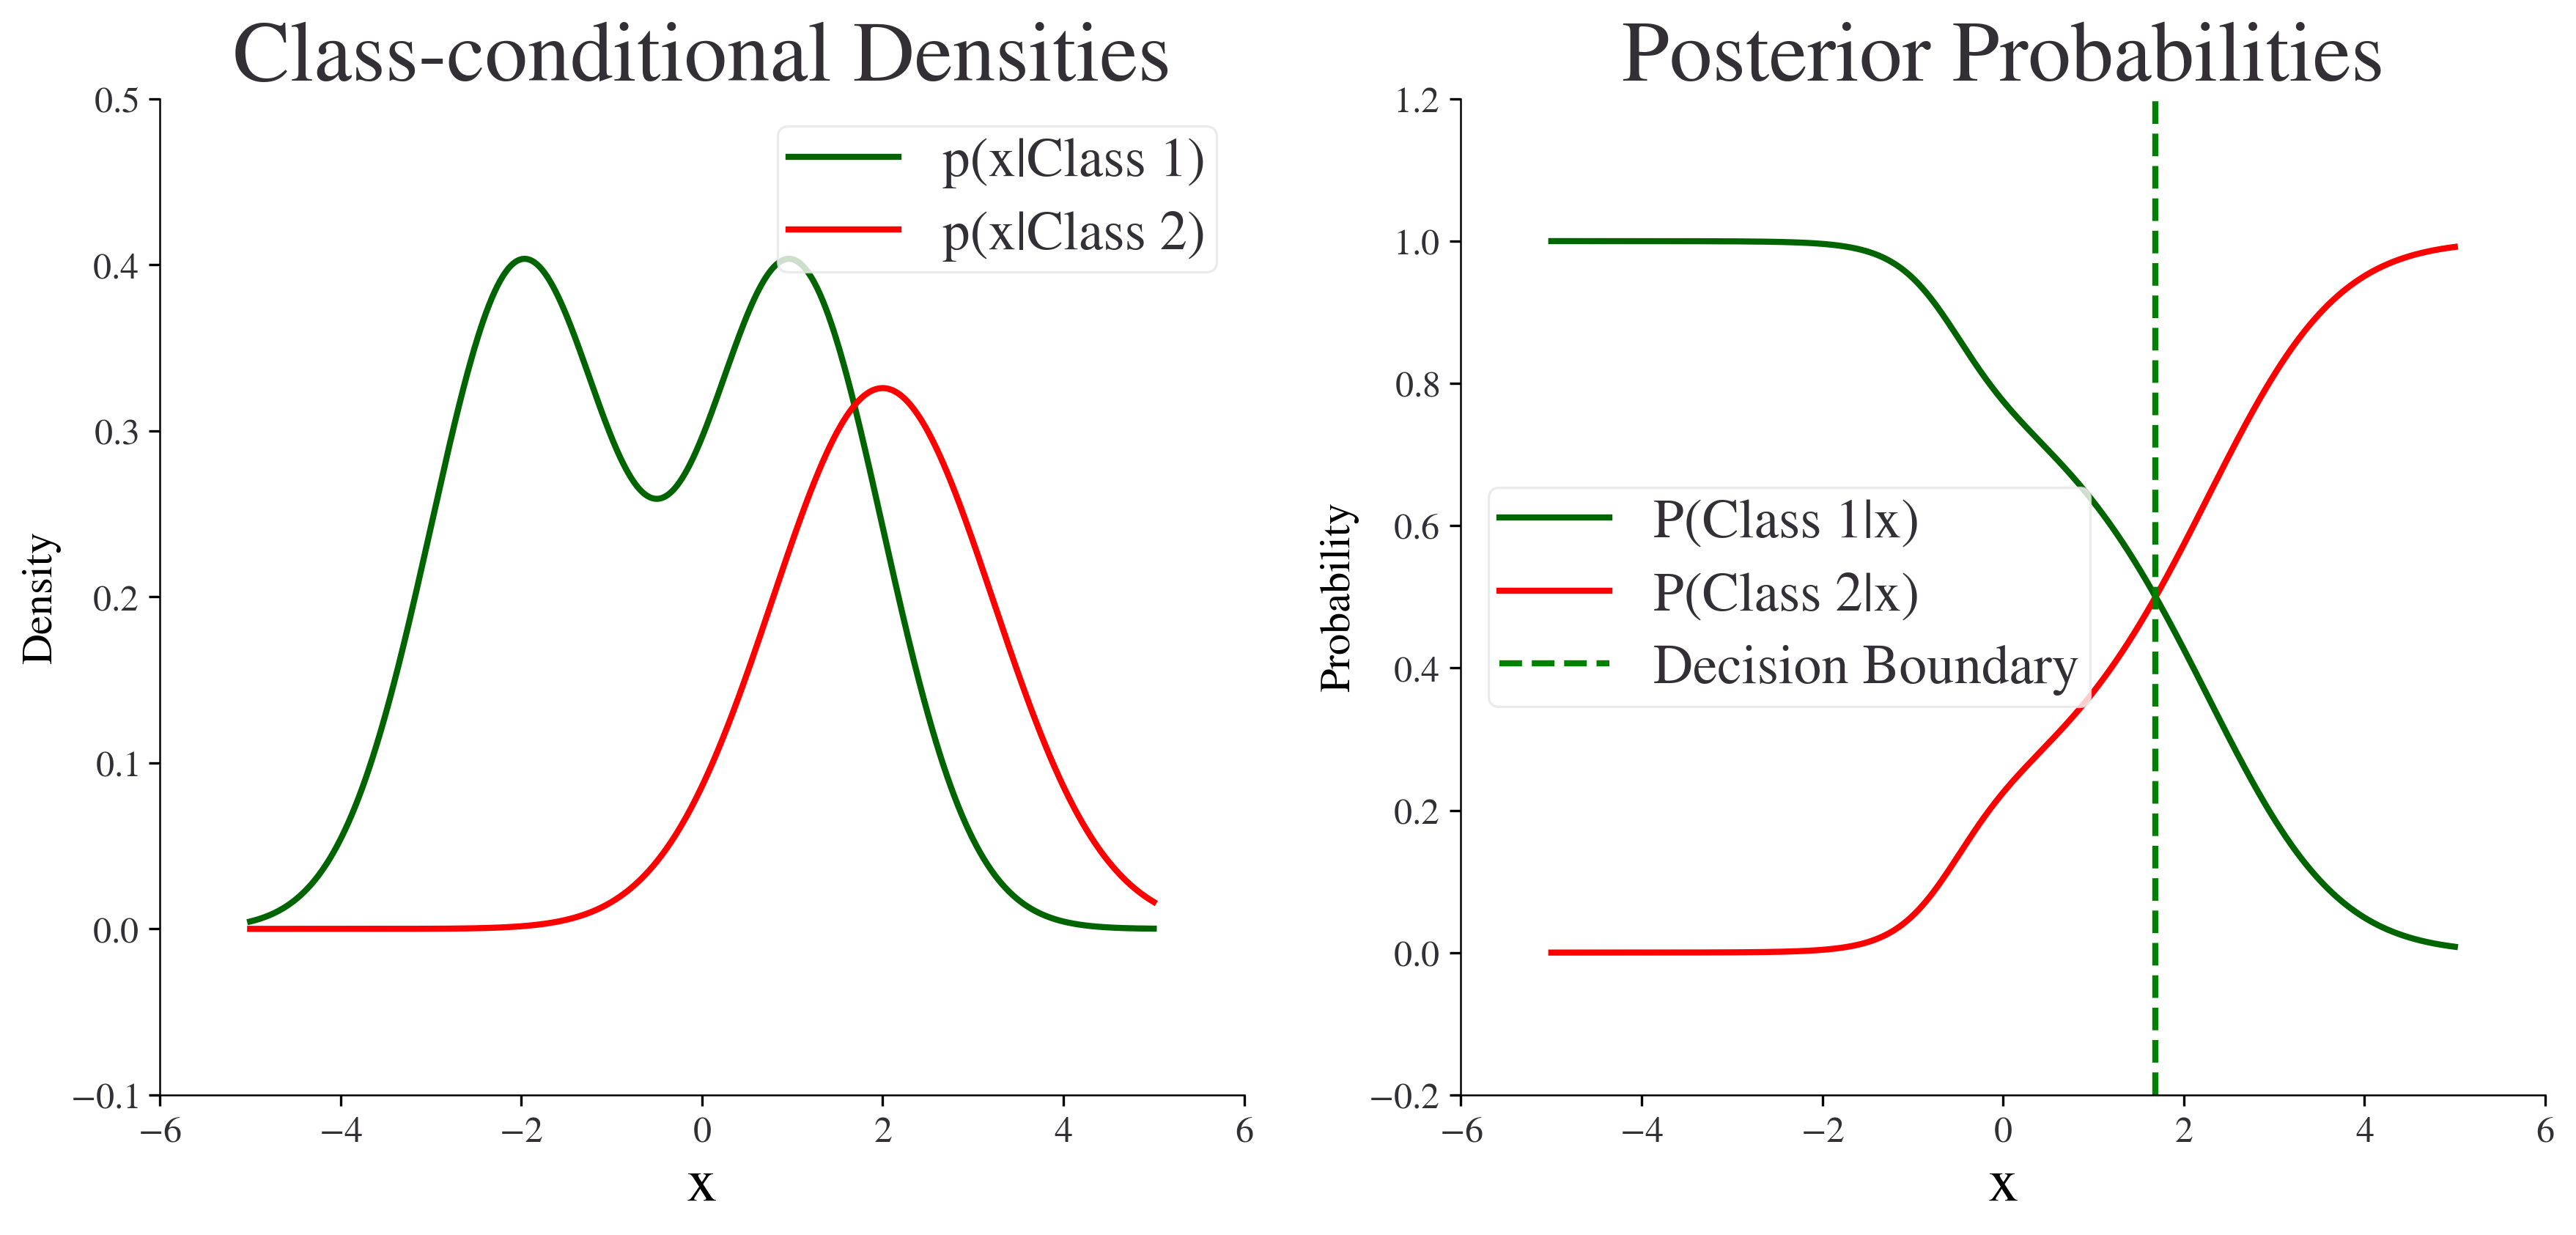

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data for class conditional densities
x = np.linspace(-5, 5, 1000)
p_c1 = (1/np.sqrt(2 * np.pi * 1)) * np.exp(-0.5 * (x - 1)**2/1) + (1/np.sqrt(2 * np.pi * 1)) * np.exp(-0.5 * (x + 2)**2/1)
p_c2 = (1/np.sqrt(2 * np.pi * 1.5)) * np.exp(-0.5 * (x - 2)**2/1.5)

# Calculate posterior probabilities assuming P(C1) = P(C2)
post_c1 = p_c1 / (p_c1 + p_c2)
post_c2 = p_c2 / (p_c1 + p_c2)

# Decision boundary where the posteriors intersect
decision_boundary = x[np.argmin(np.abs(post_c1 - post_c2))]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Left Plot - class-conditional densities
ax[0].plot(x, p_c1, label="p(x|Class 1)", color='darkgreen')
ax[0].plot(x, p_c2, label="p(x|Class 2)", color='red')
ax[0].set_title("Class-conditional Densities", loc='center', fontsize=28)
ax[0].set_xlabel("x", fontsize=20)
ax[0].set_ylabel("Density", fontsize=14)
ax[0].legend(fontsize=18)

# Right Plot - posterior probabilities
ax[1].plot(x, post_c1, label="P(Class 1|x)", color='darkgreen')
ax[1].plot(x, post_c2, label="P(Class 2|x)", color='red')
ax[1].axvline(decision_boundary, color='green', linestyle='--', label="Decision Boundary")
ax[1].set_title("Posterior Probabilities", loc='center', fontsize=28)
ax[1].set_xlabel("x", fontsize=20)
ax[1].set_ylabel("Probability", fontsize=14)
ax[1].legend(fontsize=18)

plt.subplots_adjust(wspace=0.2)
title = 'class_densities.png'
filePath = os.path.join(folder, title)
plt.savefig(filePath, dpi = 300)
plt.show()


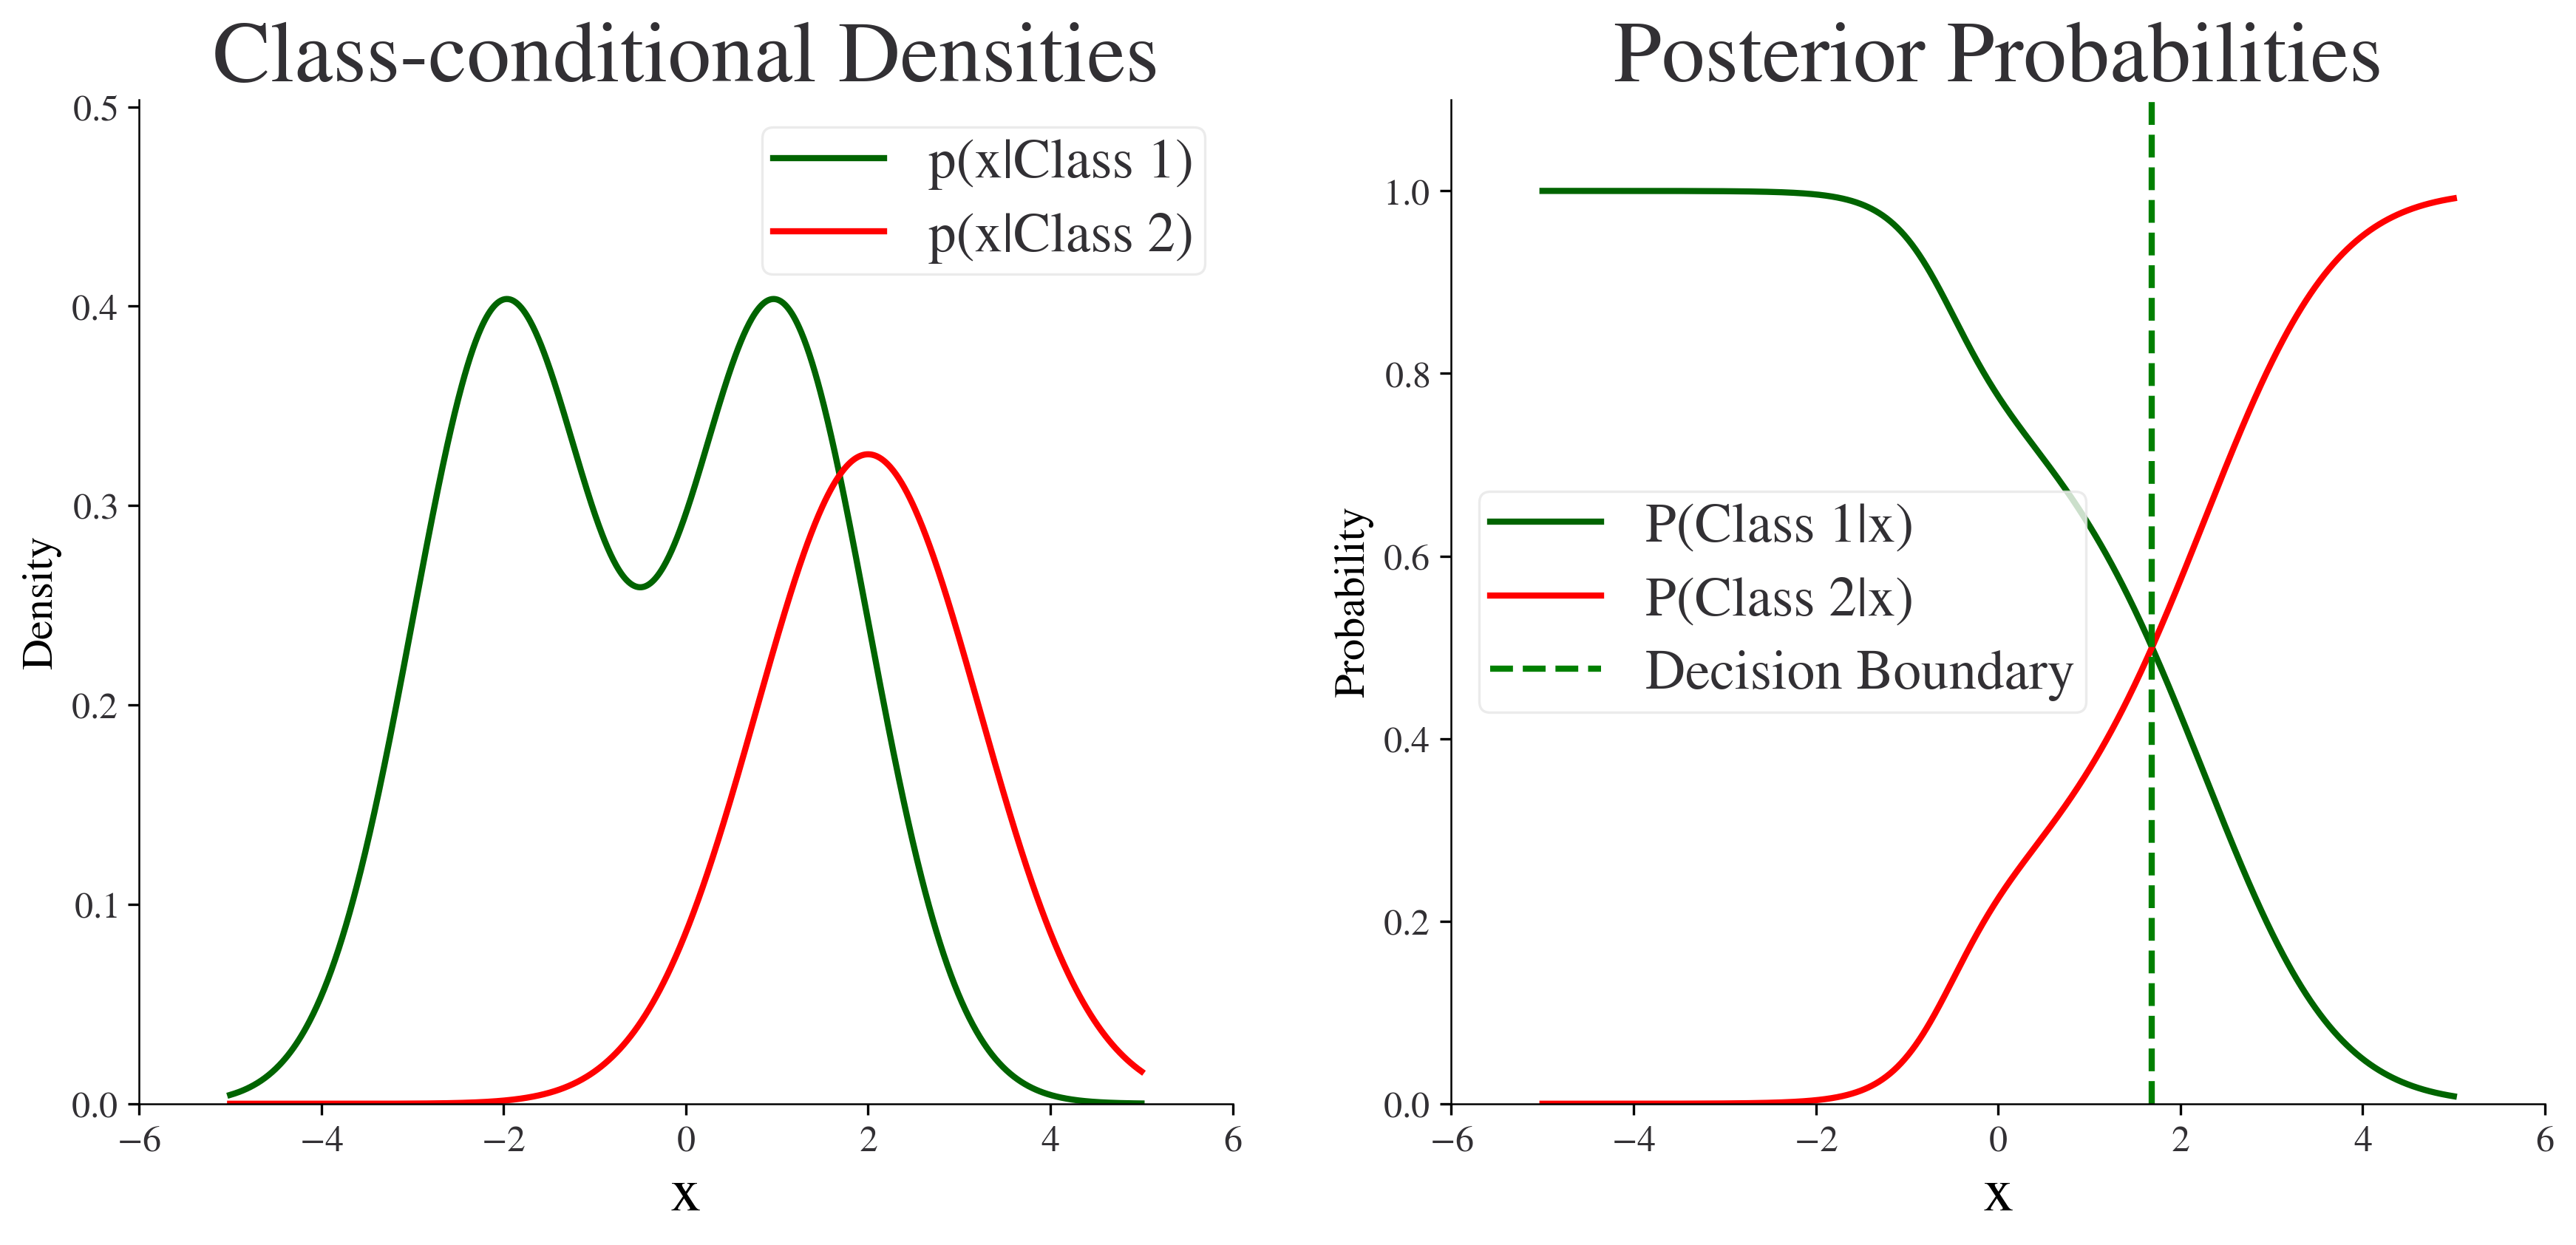

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data for class conditional densities
x = np.linspace(-5, 5, 1000)
p_c1 = (1/np.sqrt(2 * np.pi * 1)) * np.exp(-0.5 * (x - 1)**2/1) + (1/np.sqrt(2 * np.pi * 1)) * np.exp(-0.5 * (x + 2)**2/1)
p_c2 = (1/np.sqrt(2 * np.pi * 1.5)) * np.exp(-0.5 * (x - 2)**2/1.5)

# Calculate posterior probabilities assuming P(C1) = P(C2)
post_c1 = p_c1 / (p_c1 + p_c2)
post_c2 = p_c2 / (p_c1 + p_c2)

# Decision boundary where the posteriors intersect
decision_boundary = x[np.argmin(np.abs(post_c1 - post_c2))]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Left Plot - class-conditional densities
ax[0].plot(x, p_c1, label="p(x|Class 1)", color='darkgreen')
ax[0].plot(x, p_c2, label="p(x|Class 2)", color='red')
ax[0].set_ylim(0, max(np.max(p_c1), np.max(p_c2)) + 0.1)  # Setting y-axis limits to start from 0
ax[0].set_title("Class-conditional Densities", loc='center', fontsize=28)
ax[0].set_xlabel("x", fontsize=20)
ax[0].set_ylabel("Density", fontsize=14)
ax[0].legend(fontsize=18)

# Right Plot - posterior probabilities
ax[1].plot(x, post_c1, label="P(Class 1|x)", color='darkgreen')
ax[1].plot(x, post_c2, label="P(Class 2|x)", color='red')
ax[1].axvline(decision_boundary, color='green', linestyle='--', label="Decision Boundary")
ax[1].set_ylim(0, 1.1)  # Setting y-axis limits to start from 0 and end at 1.1
ax[1].set_title("Posterior Probabilities", loc='center', fontsize=28)
ax[1].set_xlabel("x", fontsize=20)
ax[1].set_ylabel("Probability", fontsize=14)
ax[1].legend(fontsize=18)

plt.subplots_adjust(wspace=0.2)
title = 'class_densities.png'
filePath = os.path.join(folder, title)
plt.savefig(filePath, dpi = 300)
plt.show()

